### Purpose
The scenario here is this: 
You have an investment account, and have been depositing money to it for quite some time, and wish to compare your current position to what you would have had you followed some other strategy. This is especially hard to figure out by yourself if, like me, your deposits were irregular in frequency and amount

It is assumed you have a csv file containing the dates and amounts of your deposits, and you current portfolio value

You select the products you would have bought with your deposits, and their respective weighings, and see where you'd have end up. Automatically the program will contrast that strategy with
- 60-40 portfolio (SPX and 10yr Bonds)
- All stock portfolio (Russel 2000) 
- Risk free portfolio (0-3 month Tbills)

I did not have my historical portfolio values, but will add the functionality to use that for users who might have it. Because only then can you adjust risk weighted returns.


# 1- Setup 

### Imports

In [1]:
import numpy as np 
import pandas as pd 
import requests 
import yfinance as yf
import xlsxwriter # Forxcel
import math 
import matplotlib.pyplot as plt
import json
import datetime
import openpyxl
import csv
from datetime import date
import seaborn as sns

## Get data from excel

- Convert nutmeg deposits to USD at current rates

In [2]:
from openpyxl import load_workbook

wb = load_workbook("Deposits_Returns.xlsx")
print(wb.sheetnames)

ws = wb['Etoro']


gbp = yf.Ticker("GBPUSD=X").info['previousClose']

data_etoro = {"Dates":[cell.value for cell in ws["A"] if type(cell.value) == datetime.datetime],
       "Deposits": [cell.value for cell in ws["B"] if type(cell.value) != str ]}

ws = wb['Nutmeg']
data_nutmeg = {"Dates":[cell.value for cell in ws["A"] if type(cell.value) == datetime.datetime],
       "Deposits": [int(cell.value * gbp) for cell in ws["B"] if type(cell.value) == int  ]}

# Filter out non numerical data
#filtered = filter(lambda x: x!= None and type(x) != str , data["Deposits"])
#data["Deposits"] = list(filtered)


['Etoro', 'Nutmeg', 'Robinhood', 'Returns', 'Spy historical data']


##### Store data in df

In [3]:
df1 = pd.DataFrame(data=data_etoro, columns=['Dates', 'Deposits'])
df2 = pd.DataFrame(data=data_nutmeg, columns=['Dates', 'Deposits'])
df = pd.concat(objs=[df1,df2])
df.sort_values(by="Dates")
df.head()

,Dates,Deposits
0,2020-06-09,200.0
1,2020-06-09,200.0
2,2020-06-10,100.0
3,2020-06-29,250.0
4,2020-07-20,250.0


In [4]:
df.shape

(119, 2)

Sum up columns with duplicate dates

In [5]:
aggregations = {'Deposits': 'sum', 'Dates': 'first'}
df = df.groupby(by=df['Dates']).aggregate(aggregations)
df.shape

(111, 2)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.columns = ['Deposit', 'Date']

#### Get Current Up to Date value 

-Above figure does not take withdrawals and mete's portion into consideration

Readjust above table for increased accuracy:

Add 437.89$ selling on 29/03/22

Need to take account of Mete's deposits:
- Remove 150 of his deposits and add 45$ deposit for when I sold his shares






### Compare with Portfolio with 50% SPY 50%QQQ

Copy dataset and halve amount of spy bought, add columns for QQQ and get price

In [9]:
df_new = df.copy()
df_new.SpyUnitsBought = df_new.SpyUnitsBought.div(2)
df_new["SpyUnitsCumulative"] = df_new["SpyUnitsBought"].cumsum()

AttributeError: 'DataFrame' object has no attribute 'SpyUnitsBought'

In [ ]:
hist_prices = get_price_by_date(df["DatesString"], "qqq",sandbox=False)

20200609 
 [{'date': '2020-06-09', 'close': 243.3, 'volume': 35046254, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200609 
 [{'date': '2020-06-09', 'close': 243.3, 'volume': 35046254, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200610 
 [{'date': '2020-06-10', 'close': 246.22, 'volume': 58084410, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200629 
 [{'date': '2020-06-29', 'close': 242.84, 'volume': 34377800, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200720 
 [{'date': '2020-07-20', 'close': 266.78, 'volume': 40610128, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200804 
 [{'date': '2020-08-04', 'close': 270.38, 'volume': 24911286, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200810 
 [{'date': '2020-08-10', 'close': 270.31, 'volume': 35088373, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20200903 
 [{'date': '2020-09-03', 'close': 287.41, 'volume': 110083282, 'change': 0, 'changePercent': 0, 'change

20211101 
 [{'date': '2021-11-01', 'close': 387.43, 'volume': 30765303, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211108 
 [{'date': '2021-11-08', 'close': 398.06, 'volume': 29256270, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211115 
 [{'date': '2021-11-15', 'close': 394.61, 'volume': 33716861, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211118 
 [{'date': '2021-11-18', 'close': 401.75, 'volume': 45721515, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211122 
 [{'date': '2021-11-22', 'close': 399.3, 'volume': 61715370, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211129 
 [{'date': '2021-11-29', 'close': 399.69, 'volume': 54447106, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211202 
 [{'date': '2021-12-02', 'close': 389.91, 'volume': 84416623, 'change': 0, 'changePercent': 0, 'changeOverTime': 0}]
20211206 
 [{'date': '2021-12-06', 'close': 386.2, 'volume': 67588801, 'change': 0, 'changePercent': 0, 'changeO

In [ ]:
df_new["QQQPrice"] = hist_prices
df_new.sort_values(by="Dates",inplace=True)
df_new["QQQUnitsBought"] = df_new["Deposits"] / df_new["QQQPrice"]/2
df_new["QQQUnitsCumulative"] = df_new["QQQUnitsBought"].cumsum()
df_new.head()

,Dates,Deposits,DatesString,SpyPrice,SpyUnitsBought,SpyUnitsCumulative,PortfolioValue,QQQPrice,QQQUnitsBought,QQQUnitsCumulative
1,2020-06-09,200,20200609,320.79,0.311730,0.311730,200.000000,243.30,0.411015,0.411015
2,2020-06-09,200,20200609,320.79,0.311730,0.623461,400.000000,243.30,0.411015,0.822030
3,2020-06-10,100,20200610,319.00,0.156740,0.780201,497.768010,246.22,0.203070,1.025101
4,2020-06-29,250,20200629,304.46,0.410563,1.190764,725.079776,242.84,0.514742,1.539843
5,2020-07-20,250,20200720,324.32,0.385422,1.576185,1022.376906,266.78,0.468551,2.008394
...,...,...,...,...,...,...,...,...,...,...
93,2022-05-02,25,20220502,414.48,0.030158,12.324860,10216.815636,318.48,0.039249,15.173956
94,2022-05-05,92,20220505,413.81,0.111162,12.436022,10292.300324,313.00,0.146965,15.320921
95,2022-05-09,19,20220509,398.17,0.023859,12.459881,9922.301564,297.15,0.031970,15.352891
98,2022-05-12,122,20220512,392.34,0.155477,12.615358,9899.019352,291.15,0.209514,15.562405


In [ ]:
df_new["PortfolioValue"] = df_new.SpyUnitsCumulative * df_new.SpyPrice + df_new.QQQUnitsCumulative * df_new.QQQPrice
df_new.head()

,Dates,Deposits,DatesString,SpyPrice,SpyUnitsBought,SpyUnitsCumulative,PortfolioValue,QQQPrice,QQQUnitsBought,QQQUnitsCumulative
1,2020-06-09,200,20200609,320.79,0.311730,0.311730,200.000000,243.30,0.411015,0.411015
2,2020-06-09,200,20200609,320.79,0.311730,0.623461,400.000000,243.30,0.411015,0.822030
3,2020-06-10,100,20200610,319.00,0.156740,0.780201,501.284334,246.22,0.203070,1.025101
4,2020-06-29,250,20200629,304.46,0.410563,1.190764,736.475376,242.84,0.514742,1.539843
5,2020-07-20,250,20200720,324.32,0.385422,1.576185,1046.987784,266.78,0.468551,2.008394
...,...,...,...,...,...,...,...,...,...,...
93,2022-05-02,25,20220502,414.48,0.030158,12.324860,9941.009230,318.48,0.039249,15.173956
94,2022-05-05,92,20220505,413.81,0.111162,12.436022,9941.598297,313.00,0.146965,15.320921
95,2022-05-09,19,20220509,398.17,0.023859,12.459881,9523.262326,297.15,0.031970,15.352891
98,2022-05-12,122,20220512,392.34,0.155477,12.615358,9480.503874,291.15,0.209514,15.562405


#### Calculate Current Value

In [ ]:
current_value = get_current_price("spy")*df_new.iloc[-1,5] + get_current_price("qqq")*df_new.iloc[-1,9]
current_value

9427.288637934453

### Add up to date date as final datapoint and plot

In [ ]:
new_row = {"Dates": datetime.datetime(2022,05,20), 'Last Name': 'Aruchamy', 'Country': 'India'}

df = df.append(df2, ignore_index = True)

In [ ]:
last_date = datetime.datetime(2022 , 5, 20)
new_row = pd.DataFrame({"Dates": [last_date], "PortfolioValue" : [current_value]})

df_temp = pd.concat([df_new,new_row,], axis=0, ignore_index=True)
df_temp

,Dates,Deposits,DatesString,SpyPrice,SpyUnitsBought,SpyUnitsCumulative,PortfolioValue,QQQPrice,QQQUnitsBought,QQQUnitsCumulative
0,2020-06-09,200.0,20200609,320.79,0.311730,0.311730,200.000000,243.30,0.411015,0.411015
1,2020-06-09,200.0,20200609,320.79,0.311730,0.623461,400.000000,243.30,0.411015,0.822030
2,2020-06-10,100.0,20200610,319.00,0.156740,0.780201,501.284334,246.22,0.203070,1.025101
3,2020-06-29,250.0,20200629,304.46,0.410563,1.190764,736.475376,242.84,0.514742,1.539843
4,2020-07-20,250.0,20200720,324.32,0.385422,1.576185,1046.987784,266.78,0.468551,2.008394
...,...,...,...,...,...,...,...,...,...,...
95,2022-05-05,92.0,20220505,413.81,0.111162,12.436022,9941.598297,313.00,0.146965,15.320921
96,2022-05-09,19.0,20220509,398.17,0.023859,12.459881,9523.262326,297.15,0.031970,15.352891
97,2022-05-12,122.0,20220512,392.34,0.155477,12.615358,9480.503874,291.15,0.209514,15.562405
98,2022-05-16,20.0,20220516,400.09,0.024994,12.640353,9711.722833,298.44,0.033508,15.595913


###  Load Data from CSV - so as not to repeat API Calls

## 2- Use Yfinance to get historical prices 

Define products and purchase weighings

In [10]:
products = {'SPY':0.3,
           'QQQ':0.3,
           'AGG' : 0.3,
           'BIL':0.1} 

products_use = sorted([key for key,value in products.items() if value != 0])



In [11]:
products_use

['AGG', 'BIL', 'QQQ', 'SPY']

##### Download data and merge

In [12]:
data = yf.download(' '.join(products_use), start="2020-06-01", end="2022-08-12")

data = pd.DataFrame(data['Adj Close'])
data.reset_index(inplace=True)

[*********************100%***********************]  4 of 4 completed


In [13]:
new_df = df.merge(how='left', right=data,left_on='Date', right_on = 'Date')

### Calculate amount of each instrument bought according to weighing

TODO: Put this into function so it works with any number of assets, and Risk free asset as well

In [14]:
units_bought = [f'{i}_units_bought' for i in data.columns.tolist()[1:] ]
units_cum = [f'{i}_units_cum' for i in data.columns.tolist()[1:] ]
units_value = [f'{i}_value' for i in data.columns.tolist()[1:] ]

for i in range(len(units_bought)):
    p = products_use[i]
    weight = products[p] 
    new_df[units_bought[i]] =  new_df.Deposit * weight / new_df[products_use[i]]
    
    

In [19]:
data.columns.tolist()

['Date', 'AGG', 'BIL', 'QQQ', 'SPY']

##### Add cumulative sums

In [ ]:
for i in range(len(units_cum)):
    new_df[units_cum[i]] = new_df[units_bought[i]].cumsum()
    
for i in range(len(units_value)):
    p = products_use[i]
    weight = products[p] 
    new_df[units_value[i]] =  new_df[products_use[i]] * new_df[units_cum[i]]
    


In [ ]:
new_df['Portfolio_Value'] = new_df[units_value].sum(axis=1)
new_df['Deposits_cum'] = new_df.Deposit.cumsum()

In [ ]:
new_df.head(1)

,Deposit,Date,AGG,BIL,QQQ,SPY,AGG_units_bought,BIL_units_bought,QQQ_units_bought,SPY_units_bought,AGG_units_cum,BIL_units_cum,QQQ_units_cum,SPY_units_cum,AGG_value,BIL_value,QQQ_value,SPY_value,Portfolio_Value,Deposits_cum
0,400.0,2020-06-09,112.505486,91.324013,240.515579,310.285675,1.066615,0.438001,0.498928,0.38674,1.066615,0.438001,0.498928,0.38674,120.0,40.0,120.0,120.0,400.0,400.0


In [ ]:
new_df

,Deposit,Date,AGG,BIL,QQQ,SPY,AGG_units_bought,BIL_units_bought,QQQ_units_bought,SPY_units_bought,AGG_units_cum,BIL_units_cum,QQQ_units_cum,SPY_units_cum,AGG_value,BIL_value,QQQ_value,SPY_value,Portfolio_Value,Deposits_cum
0,400.00,2020-06-09,112.505486,91.324013,240.515579,310.285675,1.066615,0.438001,0.498928,0.386740,1.066615,0.438001,0.498928,0.386740,120.000000,40.000000,120.000000,120.000000,400.000000,400.00
1,100.00,2020-06-10,112.966362,91.333992,243.402161,308.554260,0.265566,0.109488,0.123253,0.097228,1.332180,0.547489,0.622181,0.483968,150.491578,50.004371,151.440197,149.330392,501.266537,500.00
2,250.00,2020-06-29,113.398438,91.324013,240.478302,295.786285,0.661385,0.273751,0.311878,0.253561,1.993565,0.821240,0.934059,0.737529,226.067180,74.998907,224.621028,218.151101,743.838216,750.00
3,250.00,2020-07-20,114.478462,91.333992,264.185455,315.080536,0.655145,0.273721,0.283891,0.238034,2.648710,1.094960,1.217951,0.975564,303.220280,100.007103,321.764918,307.381179,1032.373479,1000.00
4,50.00,2020-08-04,115.274460,91.333992,267.750488,320.656952,0.130124,0.054744,0.056022,0.046779,2.778835,1.149705,1.273973,1.022343,320.328647,105.007103,341.106953,327.821329,1094.264031,1050.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,177.00,2022-07-15,102.053497,91.323051,291.869995,385.130005,0.520315,0.193817,0.181930,0.137876,28.509836,11.507024,9.701223,7.887476,2909.528426,1050.856514,2831.495802,3037.703862,9829.584603,10502.75
101,89.52,2022-07-18,101.724129,91.323051,289.399994,381.950012,0.264008,0.098026,0.092799,0.070313,28.773844,11.605049,9.794022,7.957789,2926.994181,1059.808514,2834.389770,3039.477744,9860.670209,10592.27
102,84.33,2022-07-25,102.782097,91.353012,300.269989,395.570007,0.246142,0.092312,0.084254,0.063956,29.019986,11.697362,9.878276,8.021745,2982.734991,1068.589209,2966.149736,3173.161796,10190.635732,10676.60
103,91.41,2022-08-01,104.230003,91.379997,315.269989,410.769989,0.263101,0.100033,0.086983,0.066760,29.283087,11.797394,9.965258,8.088505,3052.176217,1078.045864,3141.746872,3322.515176,10594.484129,10768.01


####  Create dataframe for the risk free asset

In [ ]:
rf_ticker = 'BIL'
data = yf.download(rf_ticker, start="2020-06-01", end="2022-08-12")

data = pd.DataFrame(data['Adj Close'])
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.columns = ['Date', rf_ticker]
rf_df = df.merge(how='left', right=data,left_on='Date', right_on = 'Date')

In [ ]:
rf_df[f'{rf_ticker}_Units_Bought'] = rf_df.Deposit / rf_df[rf_ticker]
rf_df[f'{rf_ticker}_Units_Bought_Cum'] = rf_df[f'{rf_ticker}_Units_Bought'].cumsum()
rf_df['Portfolio_Value'] = rf_df[f'{rf_ticker}_Units_Bought_Cum'] * rf_df[rf_ticker]
rf_df['Deposits_cum'] = rf_df.Deposit.cumsum()
rf_df.iloc[-1,:]

Deposit                               90.58
Date                    2022-08-08 00:00:00
BIL                                   91.43
BIL_Units_Bought                   0.990703
BIL_Units_Bought_Cum             118.964646
Portfolio_Value                10876.937625
Deposits_cum                       10858.59
Name: 104, dtype: object

#### Save data to csv 

In [ ]:
new_df.to_csv("Model_Portfolio_df.csv",index=False)
rf_df.to_csv('Risk_Free_Portfolio_df.csv',index=False)

In [ ]:
new_df.iloc[-1,:]

Deposit                           90.58
Date                2022-08-08 00:00:00
AGG                              103.18
BIL                               91.43
QQQ                          320.709991
SPY                           412.98999
AGG_units_bought               0.263365
BIL_units_bought                0.09907
QQQ_units_bought               0.084731
SPY_units_bought               0.065798
AGG_units_cum                 29.546452
BIL_units_cum                 11.896465
QQQ_units_cum                 10.049989
SPY_units_cum                  8.154303
AGG_value                   3048.602887
BIL_value                    1087.69377
QQQ_value                   3223.131901
SPY_value                   3367.645667
Portfolio_Value            10727.074225
Deposits_cum                   10858.59
Name: 104, dtype: object

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

## Make Fancy Plots and Evaluate Performance

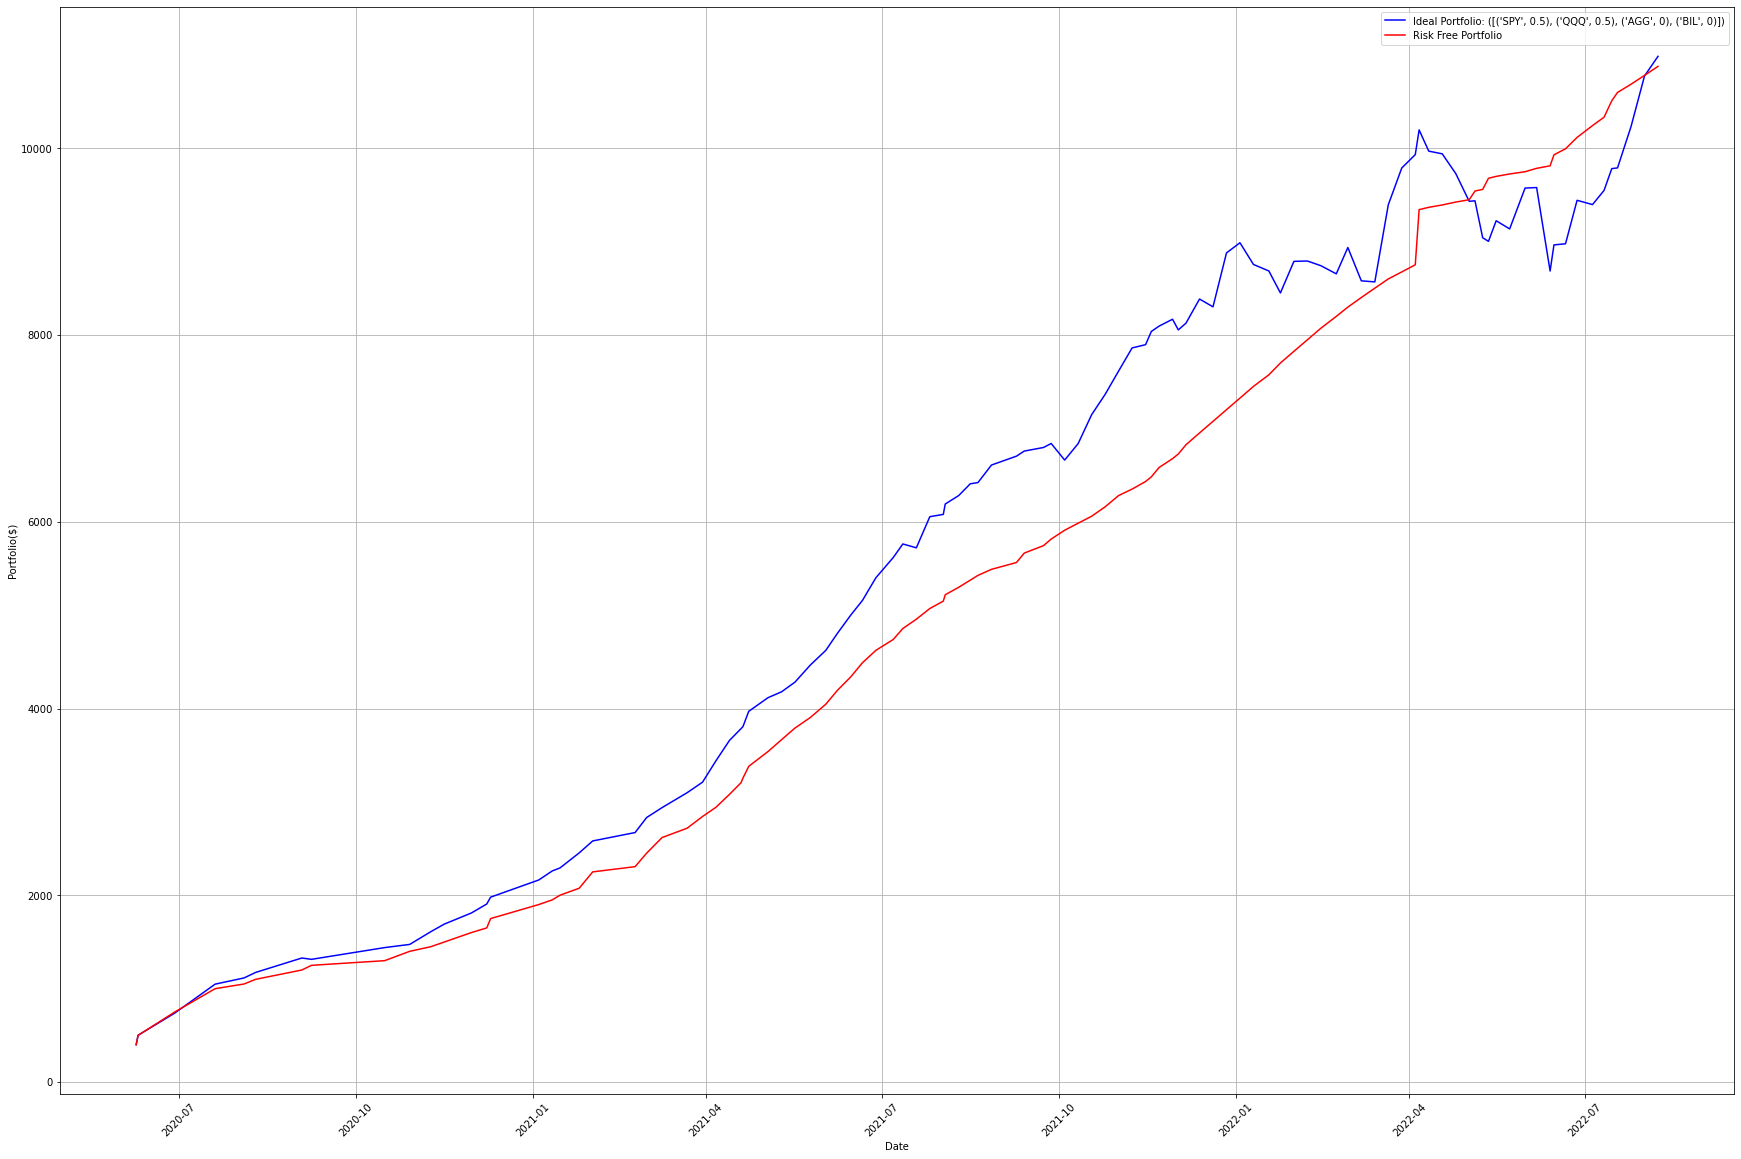

In [ ]:
fig = plt.gcf()
fig.set_size_inches(30, 20)

label = str(products.items())[10:]

ax = plt.axis()
plt.plot(new_df.Date,new_df.Portfolio_Value, color='blue', label=f'Ideal Portfolio: {label}')
plt.xlabel('Date')
plt.ylabel('Portfolio($)')
plt.plot(new_df.Date,rf_df.Portfolio_Value,'r', label='Risk Free Portfolio')

plt.legend()
plt.xticks(rotation = 45)
plt.grid()
plt.show()

### Useful performance metrics
- Max drawdown (as % of deposits)
- Risk adjusted return
- Create df of continuous day to day data and portfolio price evolution

### Imporvements to script 

#  Extra parts to delete

##### Convert weekends to mondays

In [ ]:
import datetime

# check if date is a saturday or sunday, if so update the dates list by rounding these to the next monday
for i in range(0,len(dates)):
    this_date = dates[i]
    dayno = this_date.weekday()
    
    if (dayno == 5): 
        dates[i] = dates[i] + datetime.timedelta(days=2)
    if (dayno == 6):
        dates[i] = dates[i] + datetime.timedelta(days=1)
    

# market closed on may 31 2021, nov 26 2020 (index 39, 15)
index1 = 39
index2 = 15
# manually adjust for this
dates[index1] = dates[index1] + datetime.timedelta(days=1)
dates[index2] = dates[index2] + datetime.timedelta(days=1)

In [ ]:
#convert datetime objects to strings
dates_strings = [dates[i].strftime("%Y%m%d") for i in range(0, len(dates))]
